<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [2]:
df = pd.read_csv("adult_eda.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [10]:
df.select_dtypes(include="object").describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [15]:
#look at workclass column here
df["workclass"]

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [16]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
df[df.isin(["?"])].any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
#replace all '?' in whole df with 'Unknown'


In [17]:
df.workclass=df.workclass.str.replace("?", "UNKNOWN")

In [18]:
df = df.replace({"?":"UNKNOWN"})
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [20]:
df.education

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [21]:
df["education-num"] 

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [22]:
df.groupby("education")["education-num"].value_counts()

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
Name: education-num, dtype: int64

In [19]:
#drop one of them here


In [23]:
df.drop("education-num", axis=1, inplace=True)

In [24]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [25]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [26]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [27]:
low = df.age.quantile(0.25)
upper = df.age.quantile(0.75)
upper - low 

20.0

In [48]:
#age column
IQR_age = 48-28

In [49]:
upper_lim= 48+(1.5*IQR)
upper_lim

78.0

In [50]:
lower_lim = 28-(1.5*IQR)
lower_lim

-2.0

In [33]:
df[df["age"] >=   upper_lim  ]["age"].value_counts()

90    43
78    23
80    22
79    22
81    20
82    12
84    10
83     6
88     3
85     3
87     1
86     1
Name: age, dtype: int64

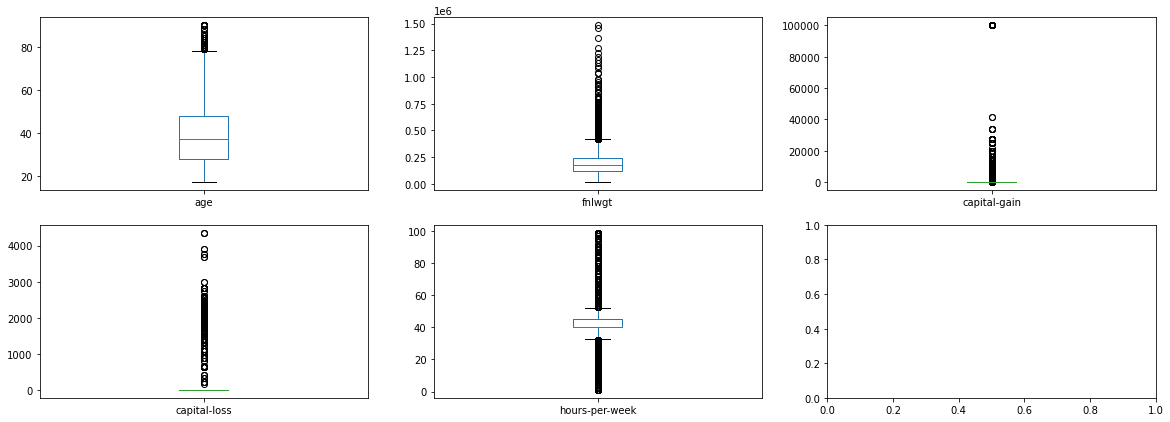

In [ ]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [35]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
10143,35,UNKNOWN,164866,10th,Divorced,UNKNOWN,Not-in-family,White,Male,0,0,99,United-States,<=50K
8393,50,Self-emp-inc,119099,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K
23226,51,Self-emp-not-inc,88528,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,<=50K
6618,27,Private,336951,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K
25831,31,Private,147284,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,99,United-States,>50K
31681,43,Private,266324,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
9811,28,Private,27956,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,99,Philippines,<=50K
10986,38,Private,111499,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,0,1977,99,United-States,>50K
32469,58,Self-emp-inc,181974,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,UNKNOWN,<=50K
17611,28,Self-emp-not-inc,104617,7th-8th,Never-married,Other-service,Other-relative,White,Female,0,0,99,Mexico,<=50K


In [51]:
#hours per week column
IQR_hour = 45-40

In [52]:
upper_lim_hour= 45+(1.5*IQR_hour)
upper_lim_hour

52.5

In [ ]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

In [53]:
df[(df['age']>upper_lim_age)&(df["hours-per-week"]>=upper_lim_hour)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,UNKNOWN,180211,Some-college,Married-civ-spouse,UNKNOWN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
118,55,Private,247552,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,56,United-States,<=50K
329,66,Private,127921,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,2050,0,55,United-States,<=50K
589,57,Self-emp-inc,103948,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,80,United-States,<=50K
634,58,Self-emp-not-inc,35723,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,54,Local-gov,34832,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
32391,55,Private,199763,HS-grad,Separated,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,<=50K
32430,61,Self-emp-not-inc,50483,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,56,United-States,<=50K
32469,58,Self-emp-inc,181974,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,UNKNOWN,<=50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [54]:
drop_index=df[(df['age']>upper_lim_age)&(df["hours-per-week"]>=upper_lim_hour)].index

In [55]:
drop_index

Int64Index([   27,   118,   329,   589,   634,   729,   741,   763,   794,
              900,
            ...
            31878, 31899, 32090, 32192, 32283, 32287, 32391, 32430, 32469,
            32548],
           dtype='int64', length=520)

In [59]:
df.drop(index="drop_index", inplace=True)
df

KeyError: ignored

In [ ]:
# check outlier values which extends the upper limit in both age and hours-per-week columns

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [64]:
df.relationship.value_counts(dropna=False)

Unmarried    17650
Husband      12832
Wife          1559
Name: relationship, dtype: int64

In [62]:
df.relationship = df.relationship.replace({np.nan:'Unmarried', "Not-in-family":"Unmarried", "Other-relative":"Unmarried"})

In [65]:
df.relationship.value_counts()

Unmarried    17650
Husband      12832
Wife          1559
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [66]:
race_count = df.race.value_counts()
race_count

White                 27333
Black                  3102
Asian-Pac-Islander     1027
Amer-Indian-Eskimo      309
Other                   270
Name: race, dtype: int64

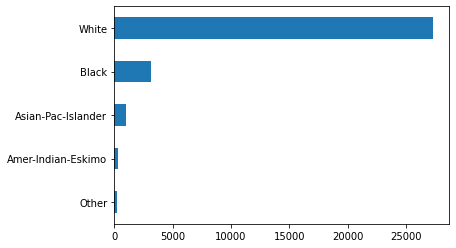

In [67]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [68]:
average_age_men =  df.loc[df['sex']=="Male", "age"].mean()
average_age_men

39.02393666854038

In [69]:
average_age_men2 =  df[df.sex =="Male"]["age"].mean()
average_age_men2

39.02393666854038

In [70]:
round(average_age_men,1)

39.0

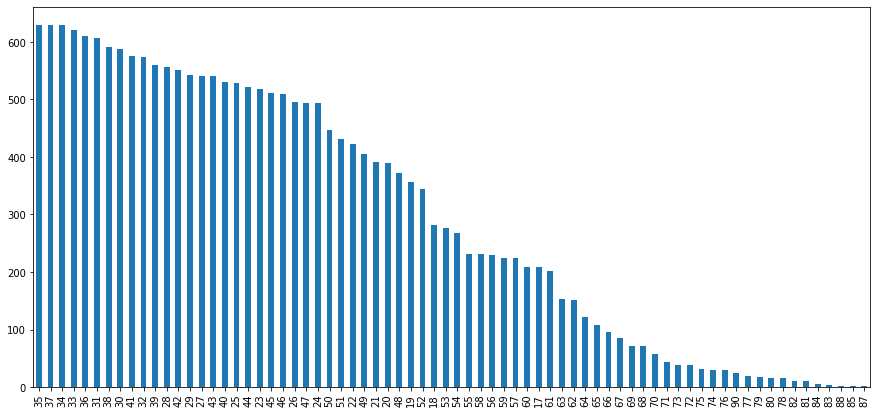

In [72]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [73]:
average_age_women = df.loc[df['sex']=="Female", "age"].mean()
average_age_women 

36.69250911811466

In [75]:
average_age_women2 =  df[df.sex =="Female"]["age"].mean()
average_age_women2

36.69250911811466

In [76]:
round(average_age_women,1)

36.7

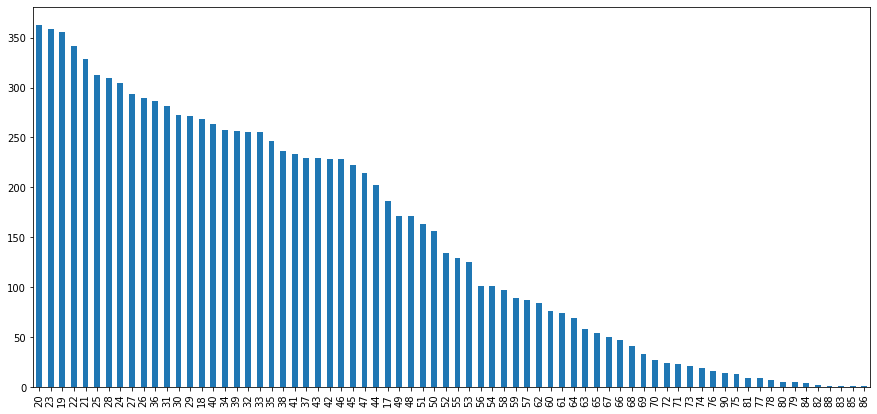

In [77]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [78]:
df.groupby("education").education.count()

education
10th              914
11th             1169
12th              431
1st-4th           165
5th-6th           327
7th-8th           621
9th               504
Assoc-acdm       1058
Assoc-voc        1370
Bachelors        5268
Doctorate         386
HS-grad         10351
Masters          1660
Preschool          50
Prof-school       557
Some-college     7210
Name: education, dtype: int64

In [79]:
df.education.value_counts()

HS-grad         10351
Some-college     7210
Bachelors        5268
Masters          1660
Assoc-voc        1370
11th             1169
Assoc-acdm       1058
10th              914
7th-8th           621
Prof-school       557
9th               504
12th              431
Doctorate         386
5th-6th           327
1st-4th           165
Preschool          50
Name: education, dtype: int64

In [80]:
upper = df.groupby("education").education.count().loc["Bachelors"]

lower = df.groupby("education").education.count().sum()

percentage_bachelors = upper / lower * 100

percentage_bachelors

16.44143441215942

In [81]:
df["education"].value_counts(normalize=True)

HS-grad         0.323055
Some-college    0.225024
Bachelors       0.164414
Masters         0.051809
Assoc-voc       0.042758
11th            0.036485
Assoc-acdm      0.033020
10th            0.028526
7th-8th         0.019381
Prof-school     0.017384
9th             0.015730
12th            0.013452
Doctorate       0.012047
5th-6th         0.010206
1st-4th         0.005150
Preschool       0.001561
Name: education, dtype: float64

In [82]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [83]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [84]:
df.salary.value_counts()

<=50K    24449
>50K      7592
Name: salary, dtype: int64

In [85]:
df.education.value_counts()

HS-grad         10351
Some-college     7210
Bachelors        5268
Masters          1660
Assoc-voc        1370
11th             1169
Assoc-acdm       1058
10th              914
7th-8th           621
Prof-school       557
9th               504
12th              431
Doctorate         386
5th-6th           327
1st-4th           165
Preschool          50
Name: education, dtype: int64

In [86]:
higher_education = (df.education == "Bachelors") |(df.education == "Masters") | (df.education =="Doctorate")
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32041, dtype: bool

In [87]:
df_high_edu = df[higher_education]
df_high_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,UNKNOWN,287372,Doctorate,Married-civ-spouse,UNKNOWN,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [89]:
df_high_edu[df_high_edu["salary"]== ">50K"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,UNKNOWN,287372,Doctorate,Married-civ-spouse,UNKNOWN,Husband,White,Male,0,0,10,United-States,>50K


In [92]:
count = df_high_edu[df_high_edu["salary"]== ">50K"].education.count()
count

3370

In [93]:
count2 = df_high_edu[df_high_edu["salary"]== ">50K"].shape[0]
count2

3370

In [94]:
perc_high_edu = count/len(df)  

In [95]:
perc_high_edu

0.105177741019319

In [96]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.52


---
# What percentage of people without advanced education make more than 50K?
---

In [ ]:
lower_education =  ~ higher_education

In [98]:
df_low_edu = df[~ higher_education]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K


In [100]:
count_low = df_low_edu[df_low_edu["salary"]== ">50K"].education.count()
count_low

4222

In [ ]:
count =

In [ ]:
count

In [101]:
perc_low_edu = count_low/len(df)

In [102]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.18


In [103]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [104]:
df["hours-per-week"].value_counts()

40    15217
50     2819
45     1824
35     1297
60     1256
      ...  
95        2
92        1
73        1
94        1
87        1
Name: hours-per-week, Length: 92, dtype: int64

In [108]:
lazy_riches = (df["hours-per-week"]==df["hours-per-week"].min())& (df["salary"]==">50K")
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32041, dtype: bool

In [123]:
df[lazy_riches]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,UNKNOWN,76043,HS-grad,Married-civ-spouse,UNKNOWN,Husband,White,Male,0,0,1,United-States,>50K


In [124]:
num_lazy_riches = df[lazy_riches].shape[0]
num_lazy_riches

2

In [125]:
num_min_workers = len (df[df["hours-per-week"]== df["hours-per-week"].min()])
num_min_workers

20

In [126]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [109]:
country_salary_df = df.groupby("native-country")[["salary"]].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,116
China,74
Columbia,59
Cuba,95
Dominican-Republic,69
Ecuador,28
El-Salvador,106
England,90


In [110]:
country_salary_df_riches = df[df.salary ==">50K"].groupby("native-country")[["salary"]].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,37
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [111]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values("salary", ascending = True)
rich_per_country

,salary
native-country,
Dominican-Republic,0.028986
Columbia,0.033898
Guatemala,0.046875
Mexico,0.051402
Nicaragua,0.058824
Peru,0.064516
Haiti,0.071429
Vietnam,0.074627
Honduras,0.076923


In [112]:
rich_per_country[rich_per_country.salary==rich_per_country.salary.max()]

,salary
native-country,
Iran,0.418605


In [116]:
#use iloc here
rich_per_country.sort_values("salary", ascending=False).iloc[[0]]

,salary
native-country,
Iran,0.418605


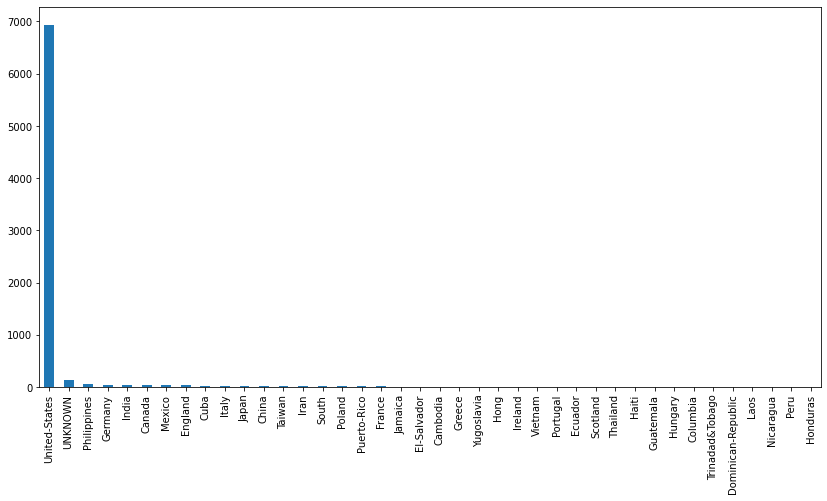

In [114]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

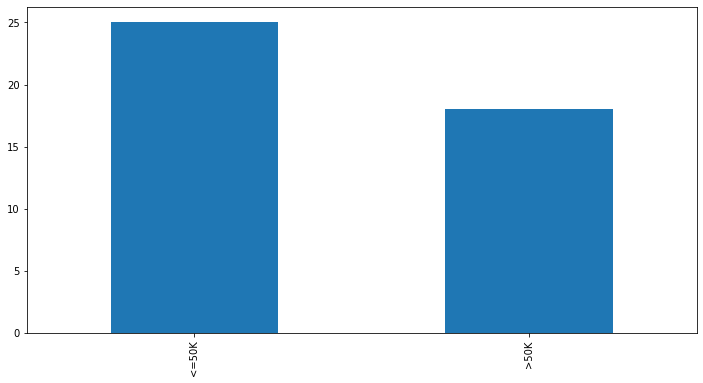

In [115]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [117]:
top_IN_occupation = (df["native-country"]=="India") & (df["salary"] == ">50K")

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32041, dtype: bool

In [118]:
df[top_IN_occupation]["occupation"].value_counts()

Prof-specialty      25
Exec-managerial      8
Tech-support         2
Other-service        2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [120]:
df[top_IN_occupation]["occupation"].value_counts().index[0]

'Prof-specialty'

'Prof-specialty'

In [121]:
 #use mode here
a = df[top_IN_occupation]["occupation"].mode()[0]
a

'Prof-specialty'

In [122]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---